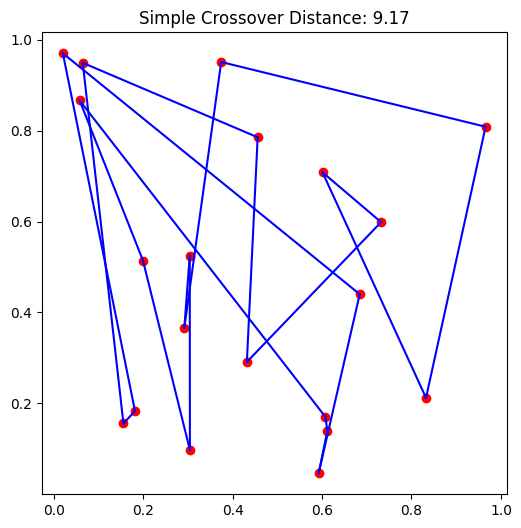

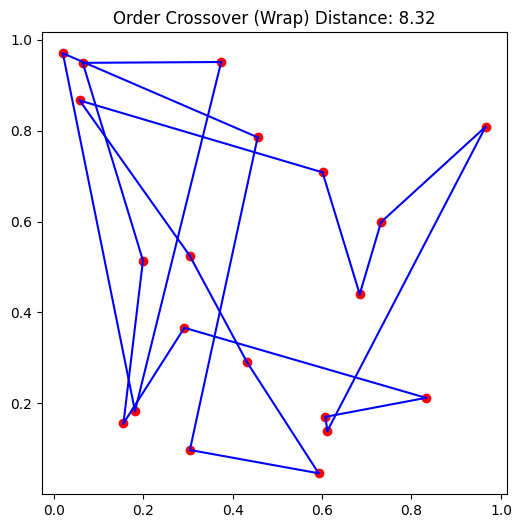

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Generate random cities
def generate_cities(num_cities, seed=42):
    np.random.seed(seed)
    return np.random.rand(num_cities, 2)

# Compute distance matrix
def distance_matrix(cities):
    num_cities = len(cities)
    dist_matrix = np.zeros((num_cities, num_cities))
    for i in range(num_cities):
        for j in range(num_cities):
            dist_matrix[i, j] = np.linalg.norm(cities[i] - cities[j])
    return dist_matrix

# Compute route distance
def route_distance(route, dist_matrix):
    return sum(dist_matrix[route[i], route[i + 1]] for i in range(len(route) - 1)) + dist_matrix[route[-1], route[0]]

# Create initial population
def create_population(size, num_cities):
    return [random.sample(range(num_cities), num_cities) for _ in range(size)]

# Simple crossover
def simple_crossover(parent1, parent2):
    size = len(parent1)
    point = random.randint(1, size - 1)
    child1 = parent1[:point] + [c for c in parent2 if c not in parent1[:point]]
    child2 = parent2[:point] + [c for c in parent1 if c not in parent2[:point]]
    return child1, child2

# Order crossover with wrap-around
def order_crossover_wrap(parent1, parent2):
    size = len(parent1)
    a, b = sorted(random.sample(range(size), 2))
    child = [-1] * size
    child[a:b] = parent1[a:b]
    fill_values = [city for city in parent2 if city not in child]
    idx = b % size
    for city in fill_values:
        while child[idx] != -1:
            idx = (idx + 1) % size
        child[idx] = city
    return child

# Mutation function
def mutate(route, mutation_rate=0.1):
    if random.random() < mutation_rate:
        i, j = random.sample(range(len(route)), 2)
        route[i], route[j] = route[j], route[i]
    return route

# Genetic Algorithm execution
def genetic_algorithm(num_cities, pop_size, generations, crossover_method):
    cities = generate_cities(num_cities)
    dist_matrix = distance_matrix(cities)
    population = create_population(pop_size, num_cities)

    for _ in range(generations):
        new_population = []
        for _ in range(pop_size // 2):
            p1, p2 = random.sample(population, 2)
            if crossover_method == 'simple':
                c1, c2 = simple_crossover(p1, p2)
            elif crossover_method == 'order_wrap':
                c1, c2 = order_crossover_wrap(p1, p2), order_crossover_wrap(p2, p1)
            new_population.extend([mutate(c1), mutate(c2)])
        population = sorted(new_population, key=lambda r: route_distance(r, dist_matrix))[:pop_size]

    best_route = population[0]
    best_distance = route_distance(best_route, dist_matrix)
    return best_route, best_distance, cities

# Run comparisons
num_cities = 20
pop_size = 100
generations = 200

best_simple, dist_simple, cities = genetic_algorithm(num_cities, pop_size, generations, 'simple')
best_order_wrap, dist_order_wrap, _ = genetic_algorithm(num_cities, pop_size, generations, 'order_wrap')

# Visualization
def plot_route(cities, route, title):
    plt.figure(figsize=(6, 6))
    plt.scatter(cities[:, 0], cities[:, 1], c='red')
    for i in range(len(route)):
        plt.plot([cities[route[i - 1], 0], cities[route[i], 0]],
                 [cities[route[i - 1], 1], cities[route[i], 1]], 'blue')
    plt.title(title)
    plt.show()

plot_route(cities, best_simple, f'Simple Crossover Distance: {dist_simple:.2f}')
plot_route(cities, best_order_wrap, f'Order Crossover (Wrap) Distance: {dist_order_wrap:.2f}')